## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_UA_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
pd.set_option('display.expand_frame_repr', True)
print(asos_snotel_UA_df.keys())

#delete empty columns as they mess up loops
#del asos_snotel_UA_df['CMtn_6hr_Precipitation_mm']            #empty column


Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KDEN_d850_700_height_m', 'KDEN_d850_700_tmpc', 'KDEN_d850_700_dwpc',
       'KDEN_d850_700_drct', 'KDEN_d850_700_speed_kts',
       'KDEN_d700_250_height_m', 'KDEN_d700_250_tmpc', 'KDEN_d700_250_dwpc',
       'KDEN_d700_250_drct', 'KDEN_d700_250_speed_kts'],
      dtype='object', length=106)


### Create 12 hr snowfall dataframe by using 12hr snowdepth difference

In [3]:
fig = plt.figure(figsize=(10,5))

#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in'] = asos_snotel_UA_df['CMtnSNTL_SnowDepth_in'].resample('12H').last()
asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in'] = asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in']-asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in'].shift(+12)
asos_snotel_UA_df['CMtnSNTL_12hrSNOWFALL_in'] = asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in'][asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in']>=3]


#print(asos_snotel_df['12hr-dSNWD_in'].describe())
print(asos_snotel_UA_df['CMtnSNTL_12hrSNOWFALL_in'].describe())


count    316.000000
mean       4.587373
std        2.118816
min        3.000000
25%        3.000000
50%        4.000000
75%        5.030000
max       16.000000
Name: CMtnSNTL_12hrSNOWFALL_in, dtype: float64


<Figure size 720x360 with 0 Axes>

In [4]:
asos_snotel_UA_df['LXV_6hr_delta_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+6)
print(asos_snotel_UA_df['LXV_6hr_delta_Pressure_hp'].describe())

count    94862.000000
mean        -0.000349
std          3.336246
min        -16.000000
25%         -2.100000
50%          0.000000
75%          2.100000
max         15.900000
Name: LXV_6hr_delta_Pressure_hp, dtype: float64


### **Do some quick timeseries plots to visually see the data:**

In [5]:
print(asos_snotel_UA_df.info())
print(asos_snotel_UA_df.describe())
print(asos_snotel_UA_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104599 entries, 2005-04-12 00:00:00 to 2017-12-31 12:00:00
Columns: 110 entries, CMtnSNTL_Temp_degC to LXV_6hr_delta_Pressure_hp
dtypes: float64(110)
memory usage: 88.6 MB
None
       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count         95587.00000           88952.000000           73424.000000   
mean              1.36880              19.517535               1.456547   
std               9.11653              20.249353               9.210427   
min             -28.60000              -3.000000             -28.000000   
25%              -5.00000               0.000000              -5.000000   
50%               1.40000              15.000000               1.000000   
75%               7.80000              38.000000               9.000000   
max              25.10000              69.000000              24.000000   

       CMtn_Dewpoint_degC  CMtn_WindDirection_deg  CMtn_WindSpeed_mps  \
count        73402.00

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hrSNOWFALL_in']


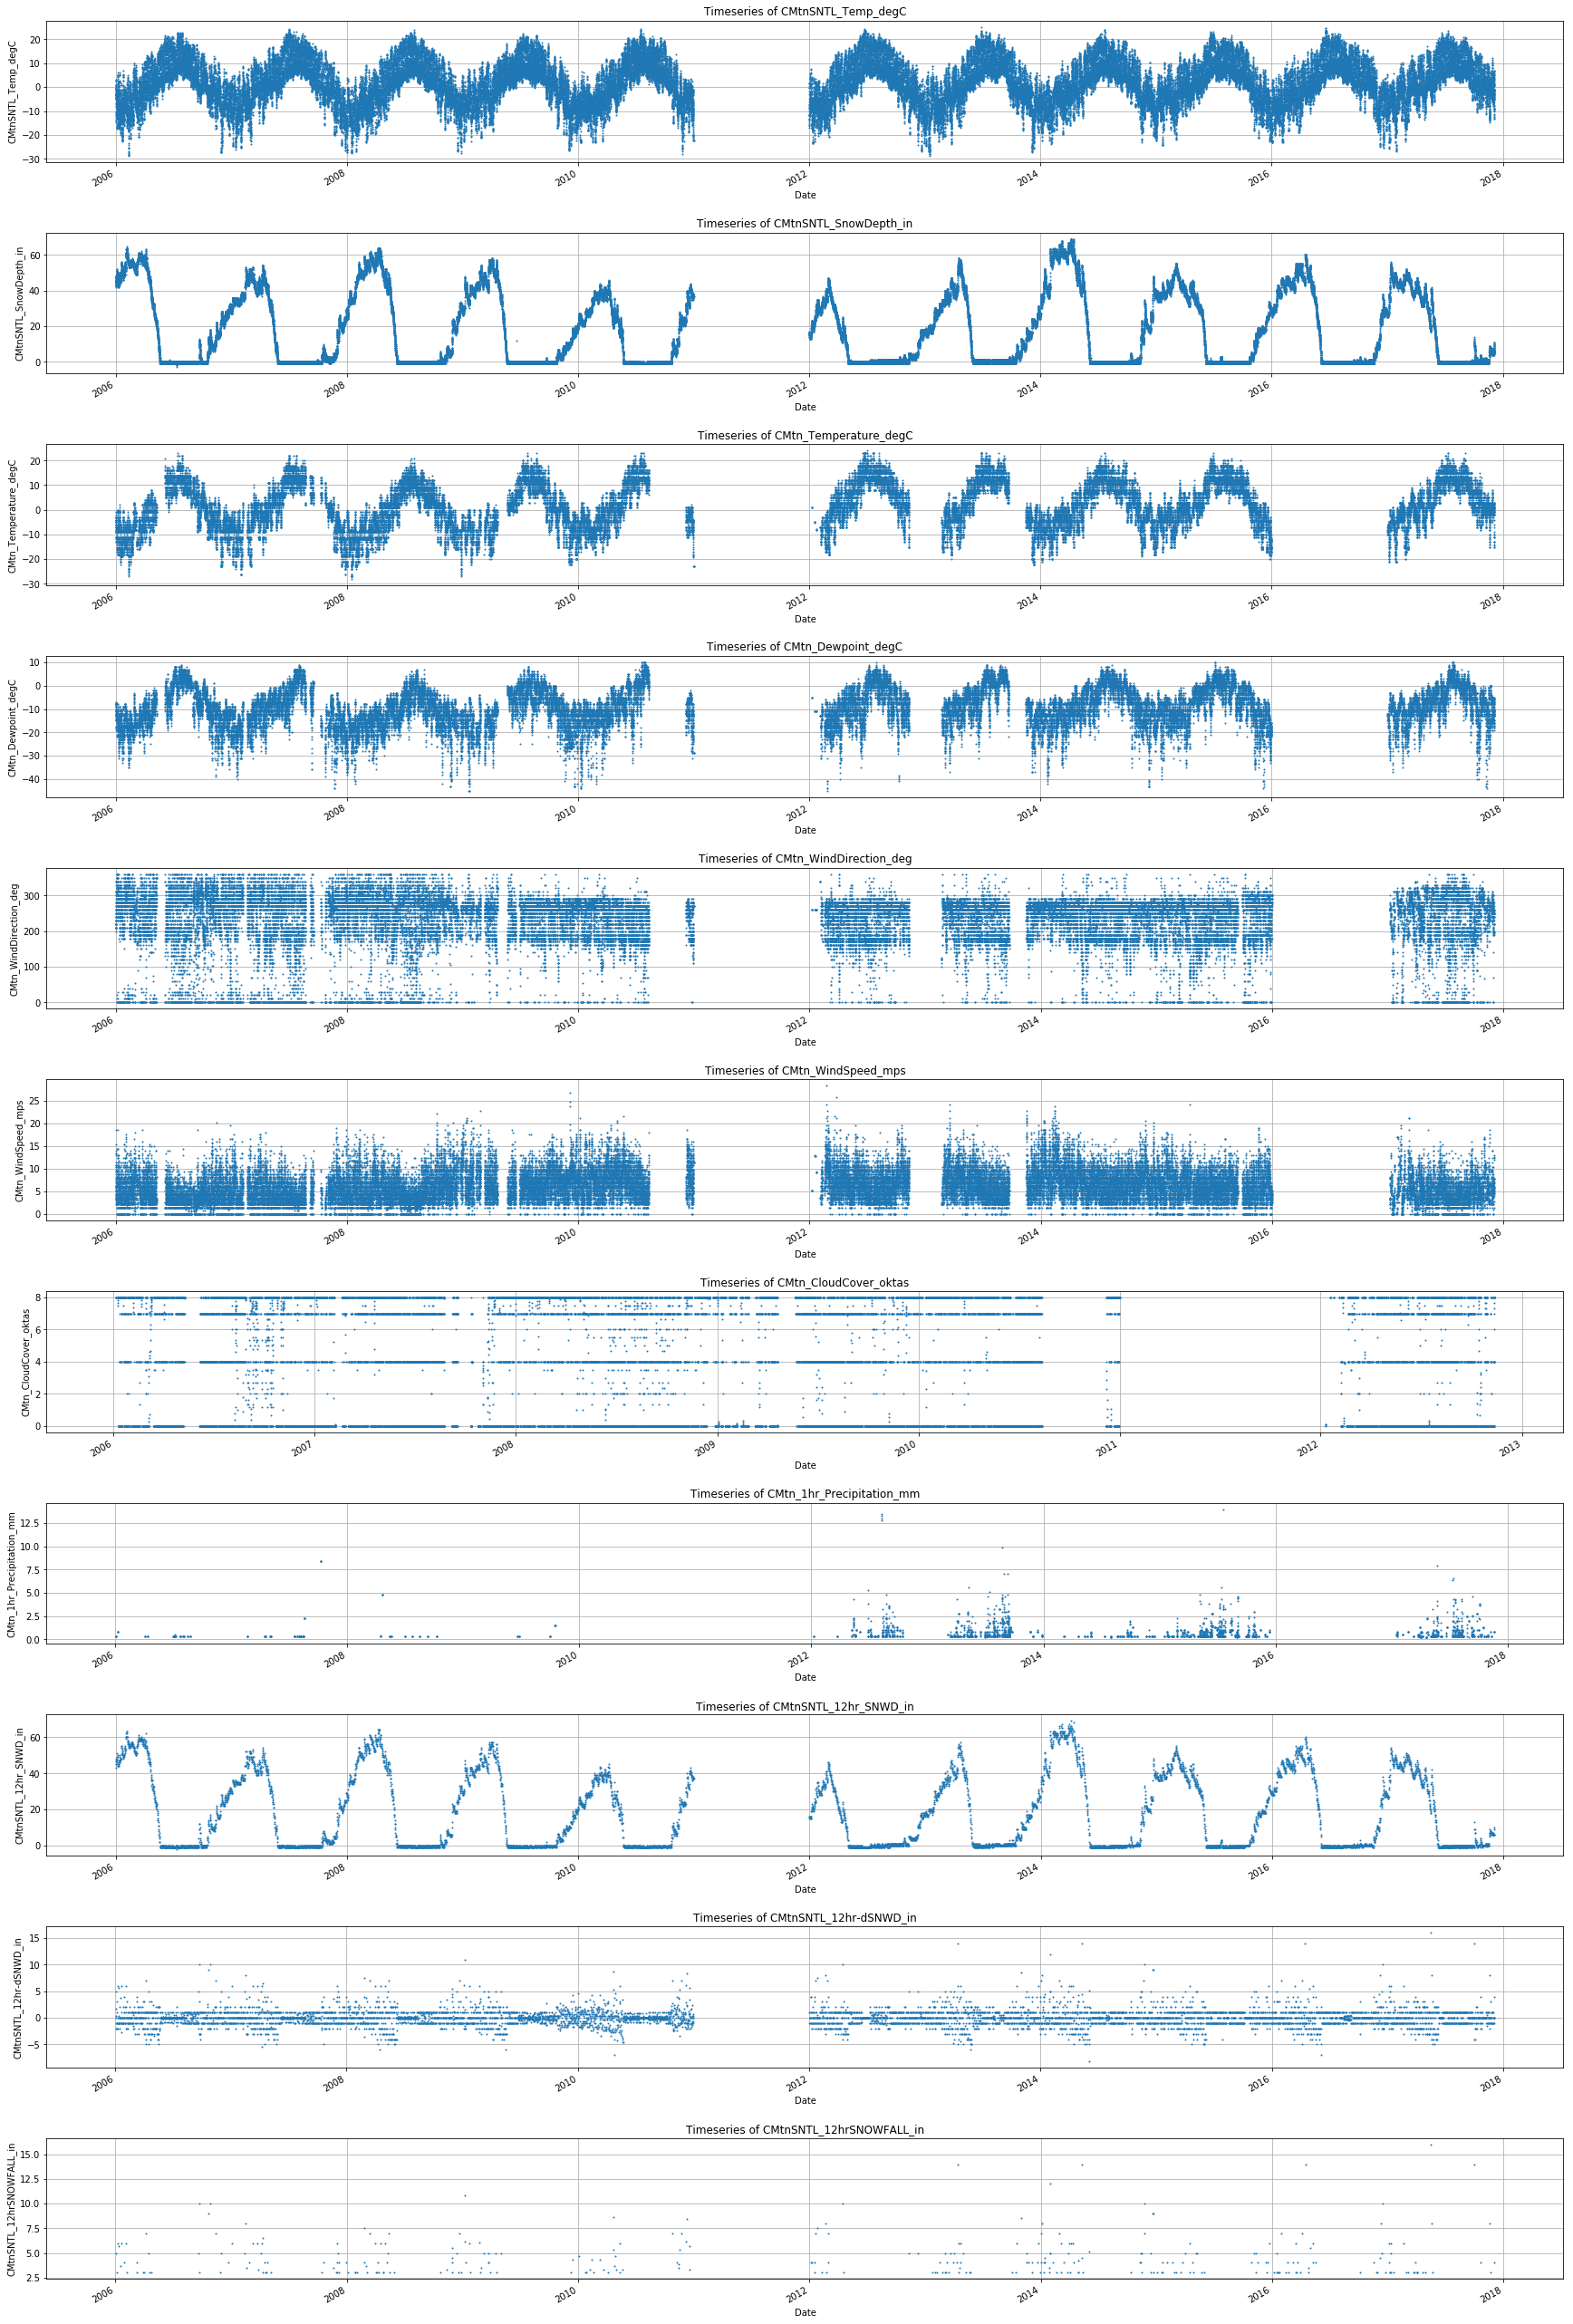

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hrSNOWFALL_in']


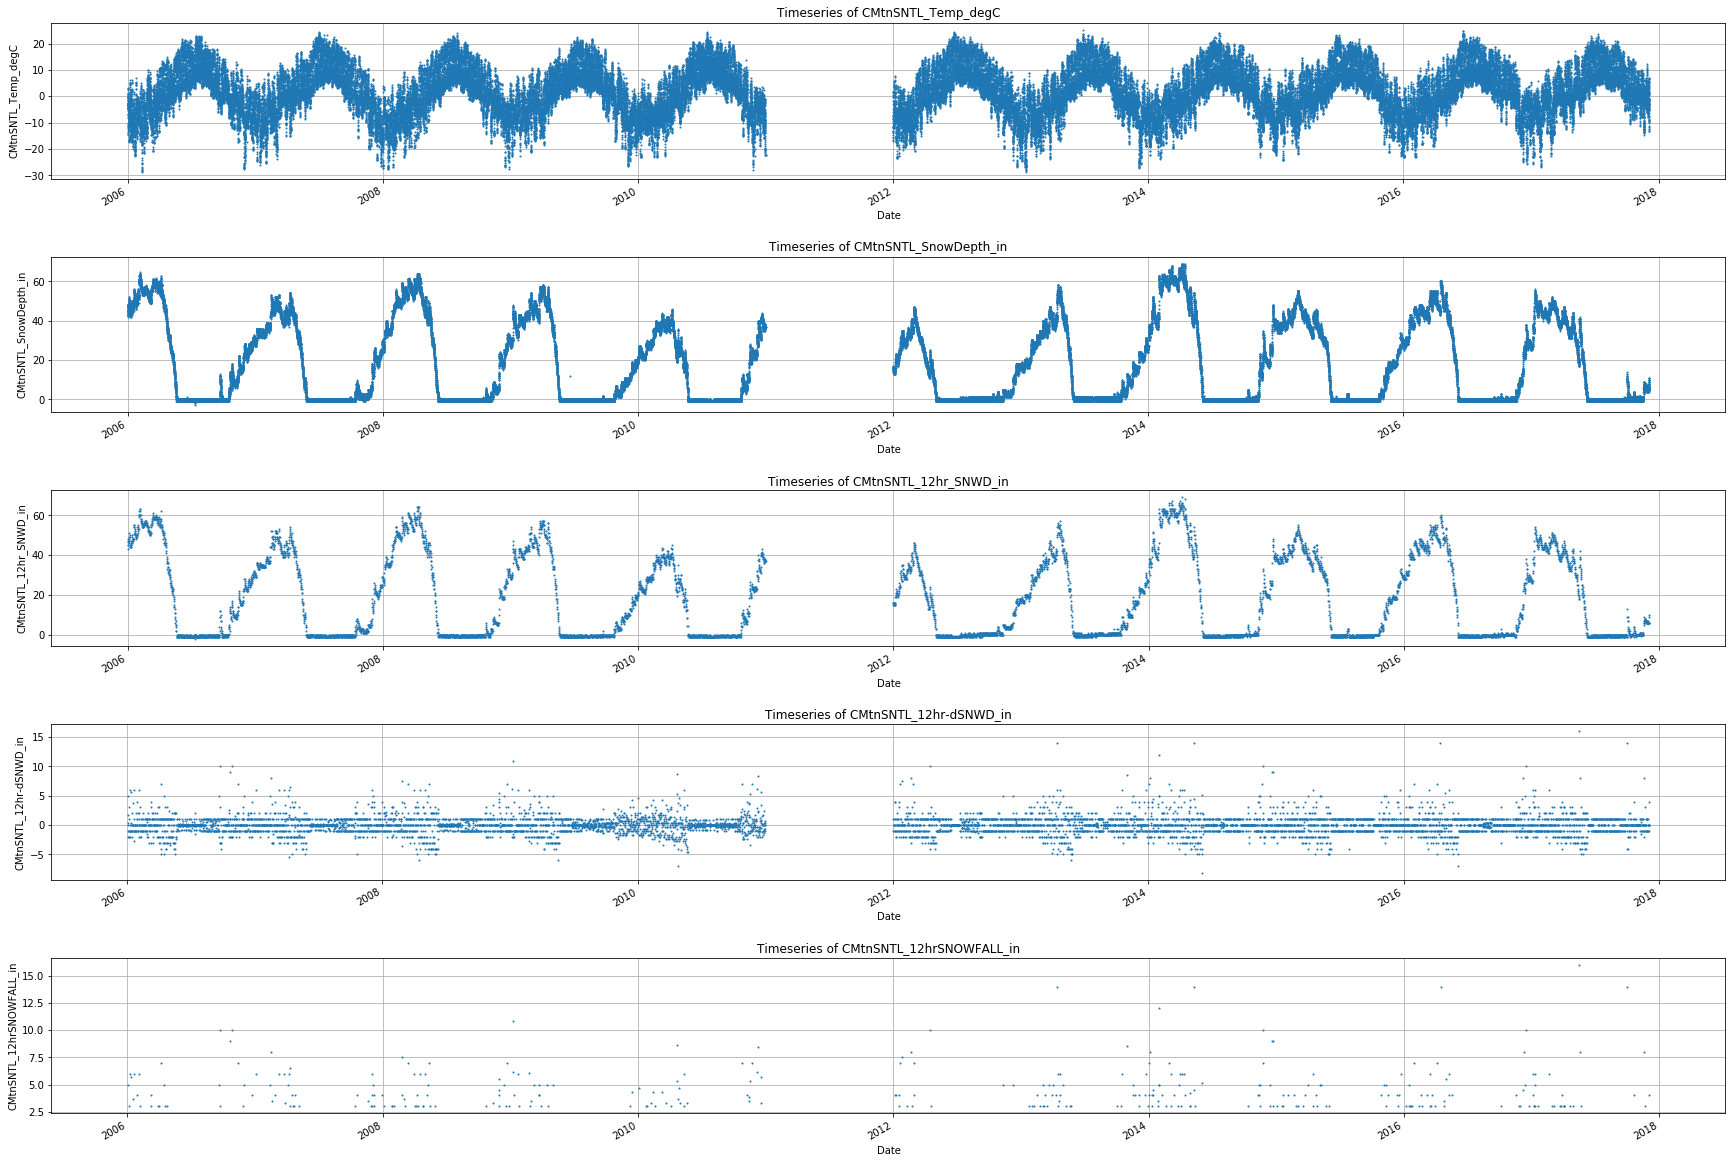

['LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', 'LXV_WindSpeed_m/s', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm', 'LXV_6hr_delta_Pressure_hp']


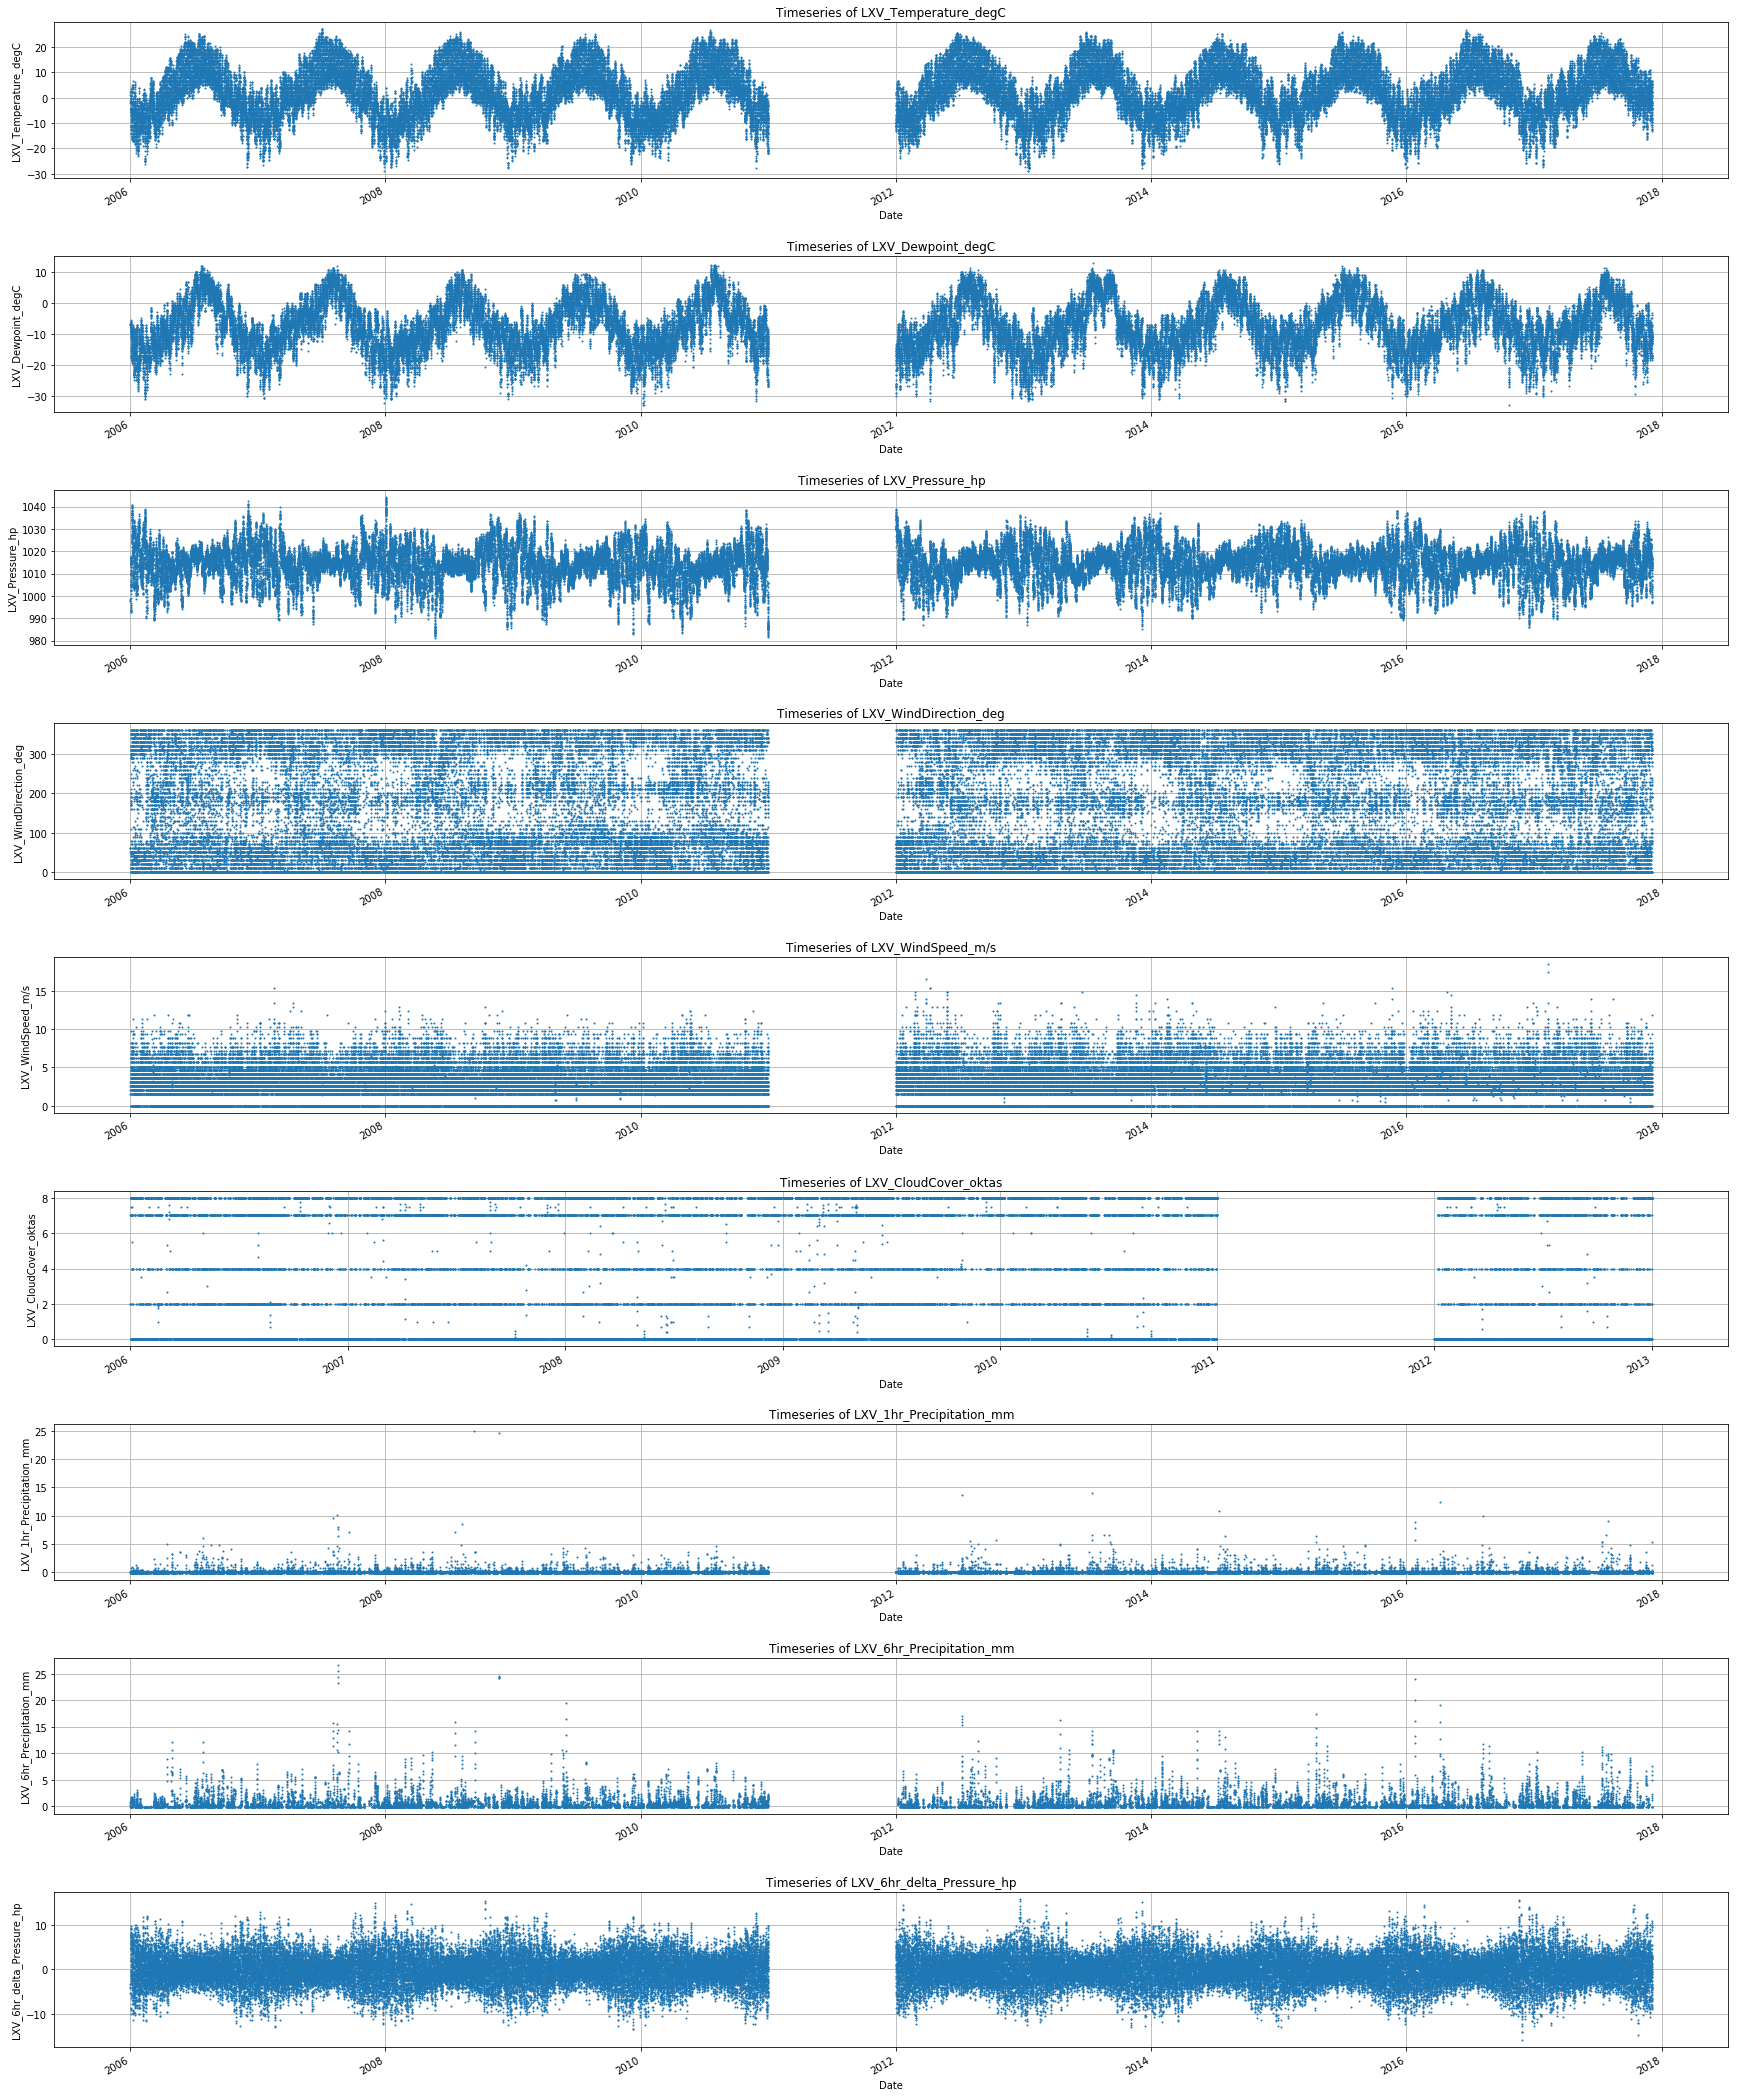

['KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts']


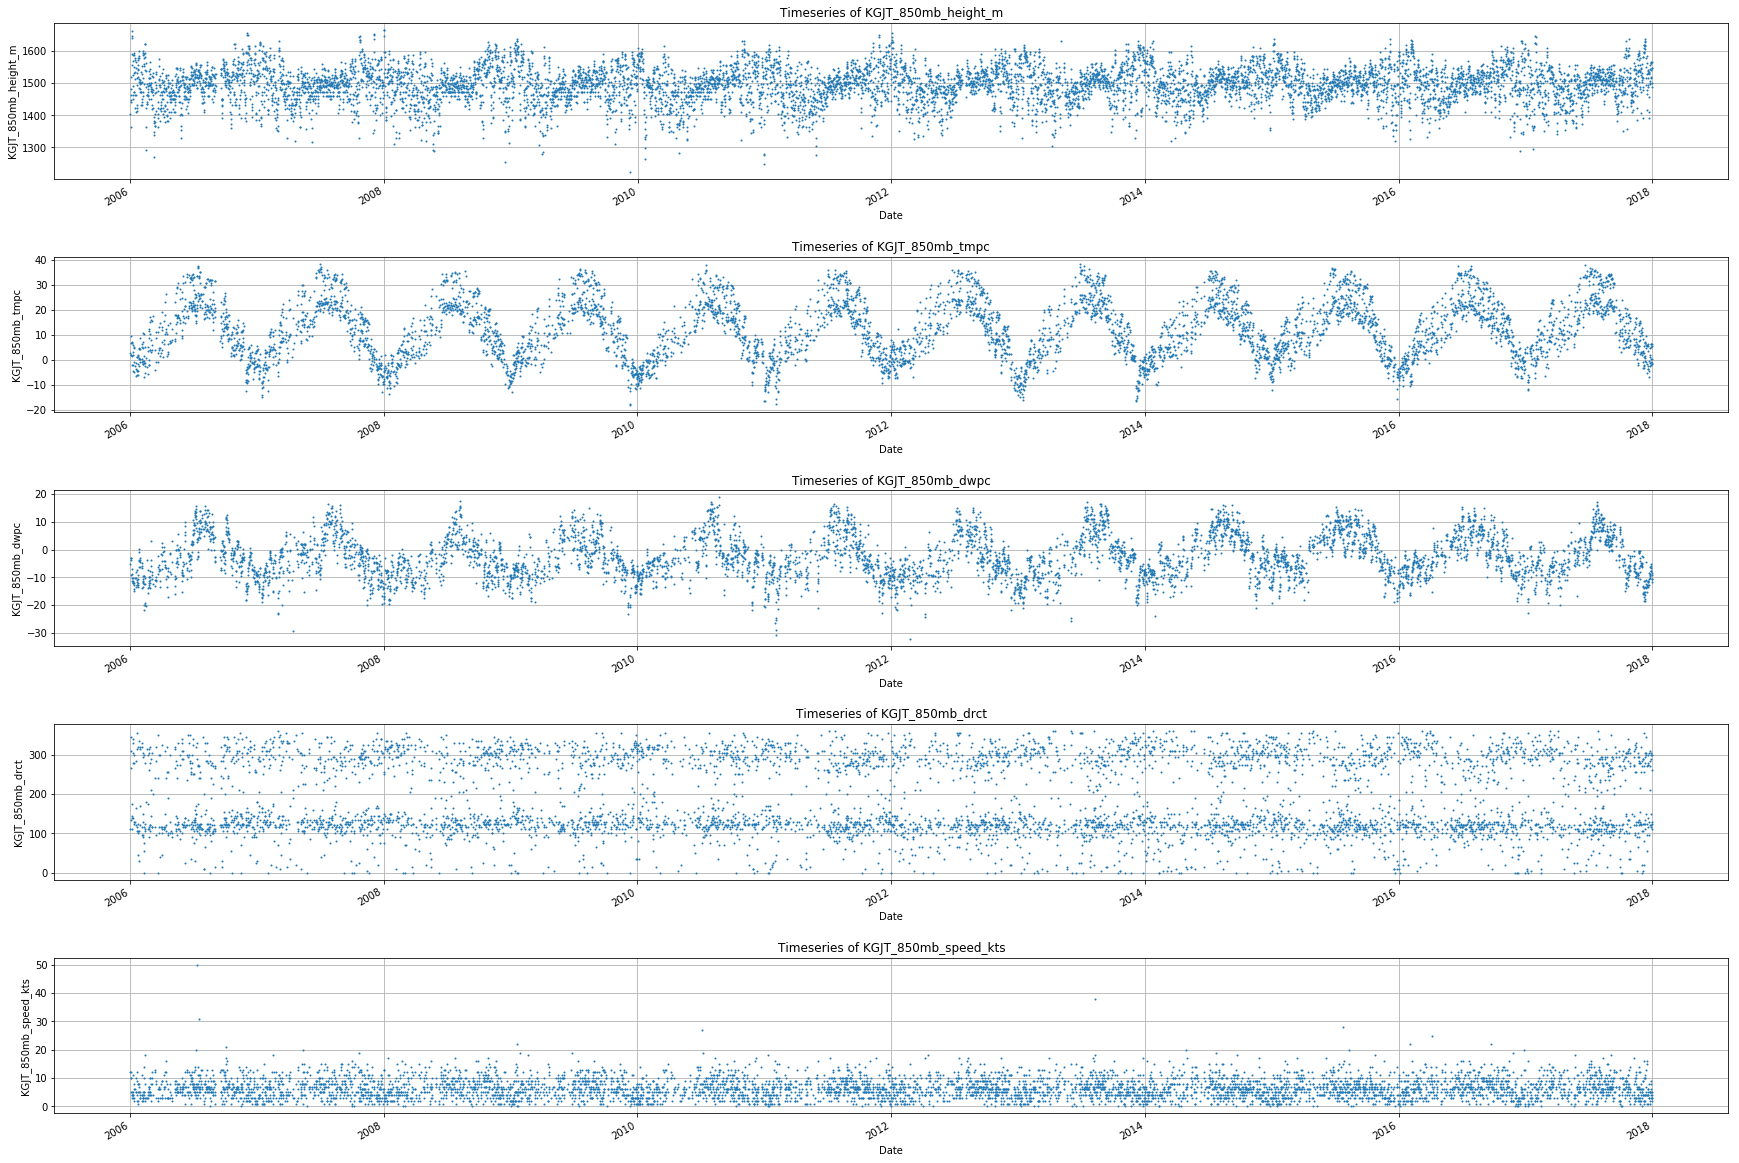

['KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts']


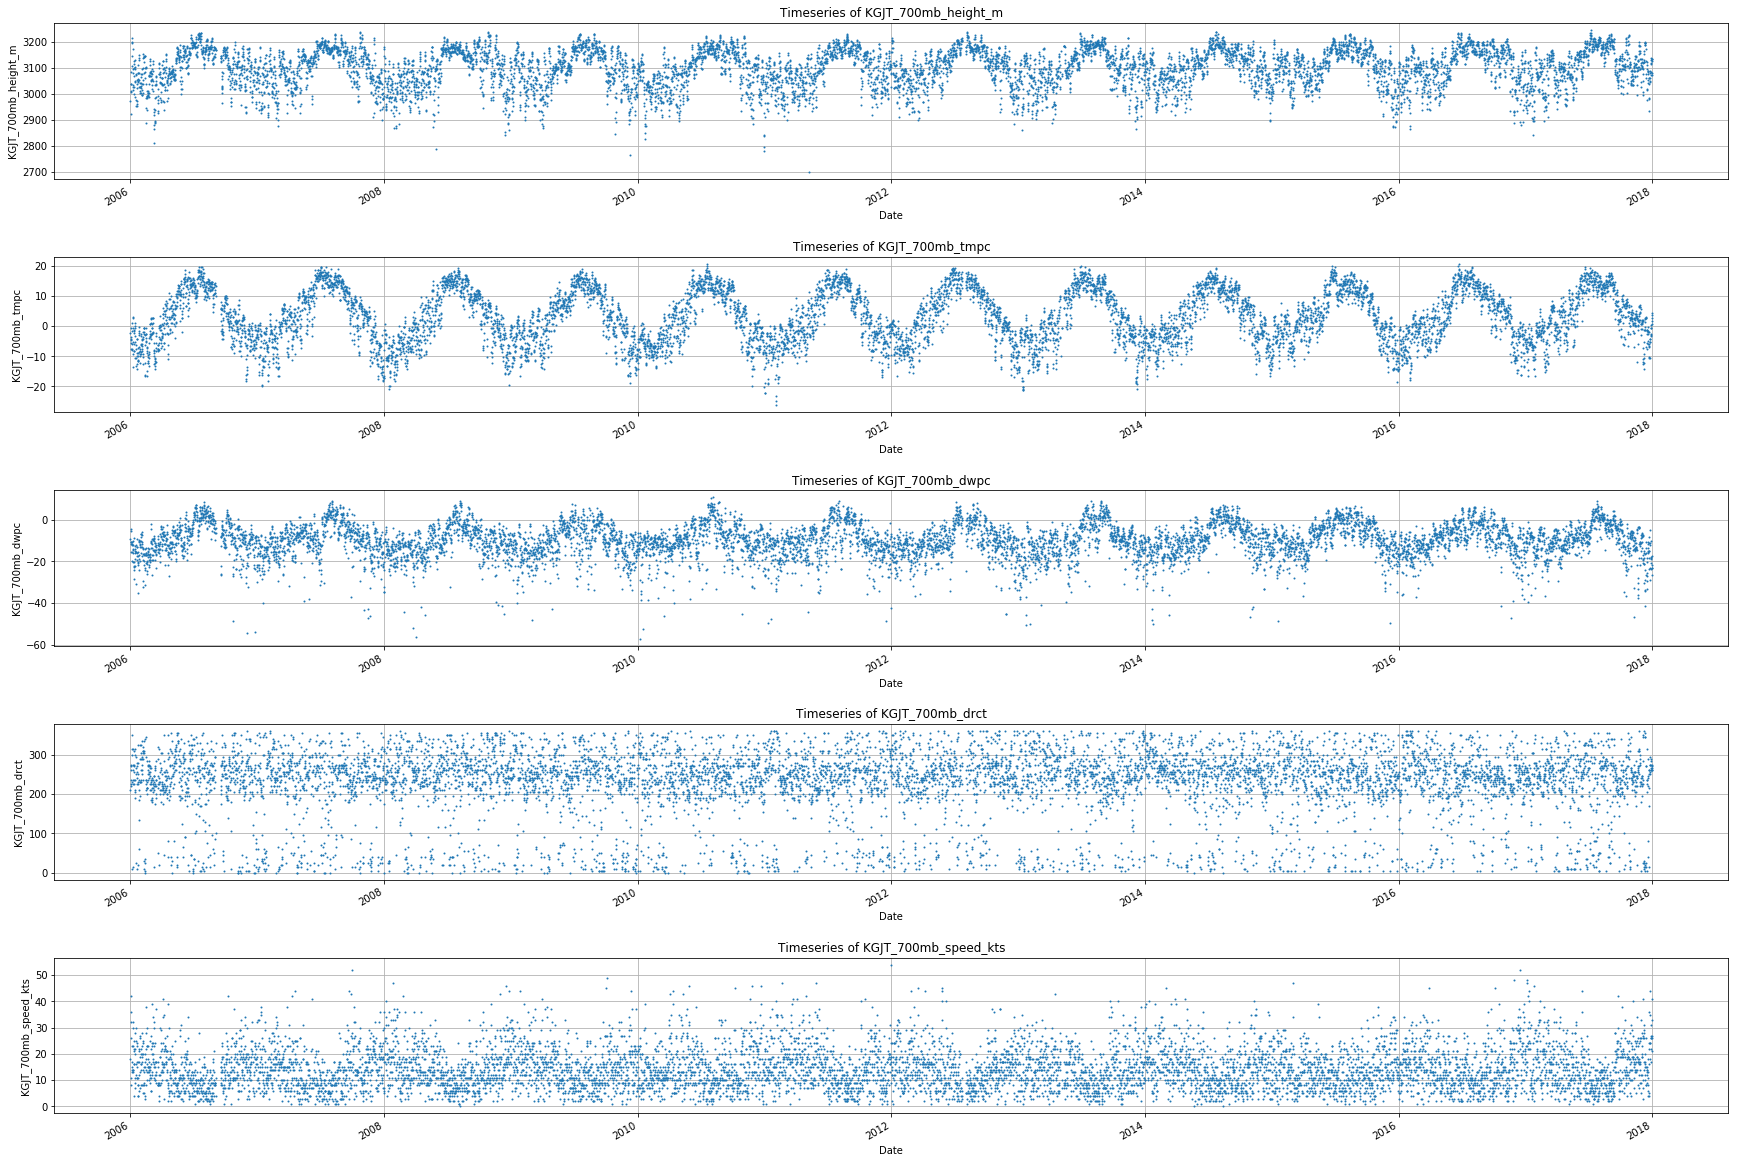

[]


<Figure size 2160x5040 with 0 Axes>

['KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts']


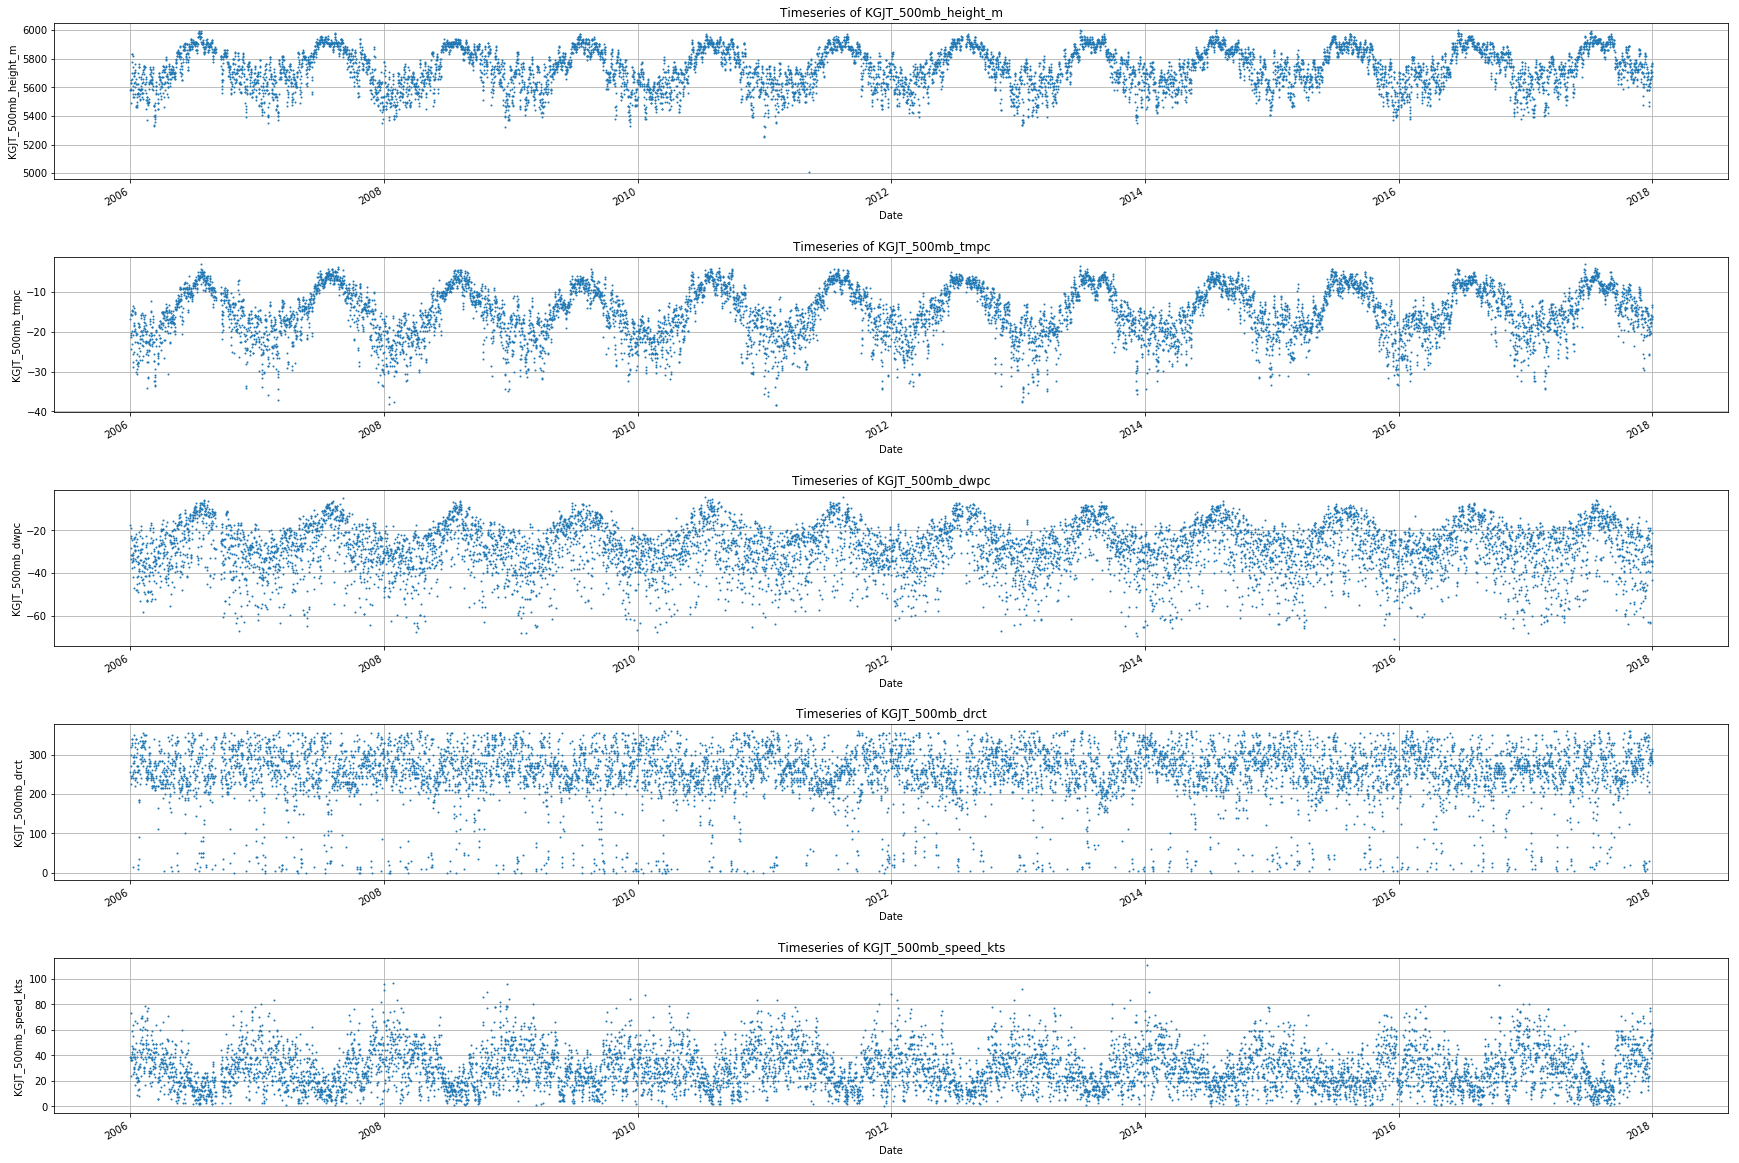

['KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts']


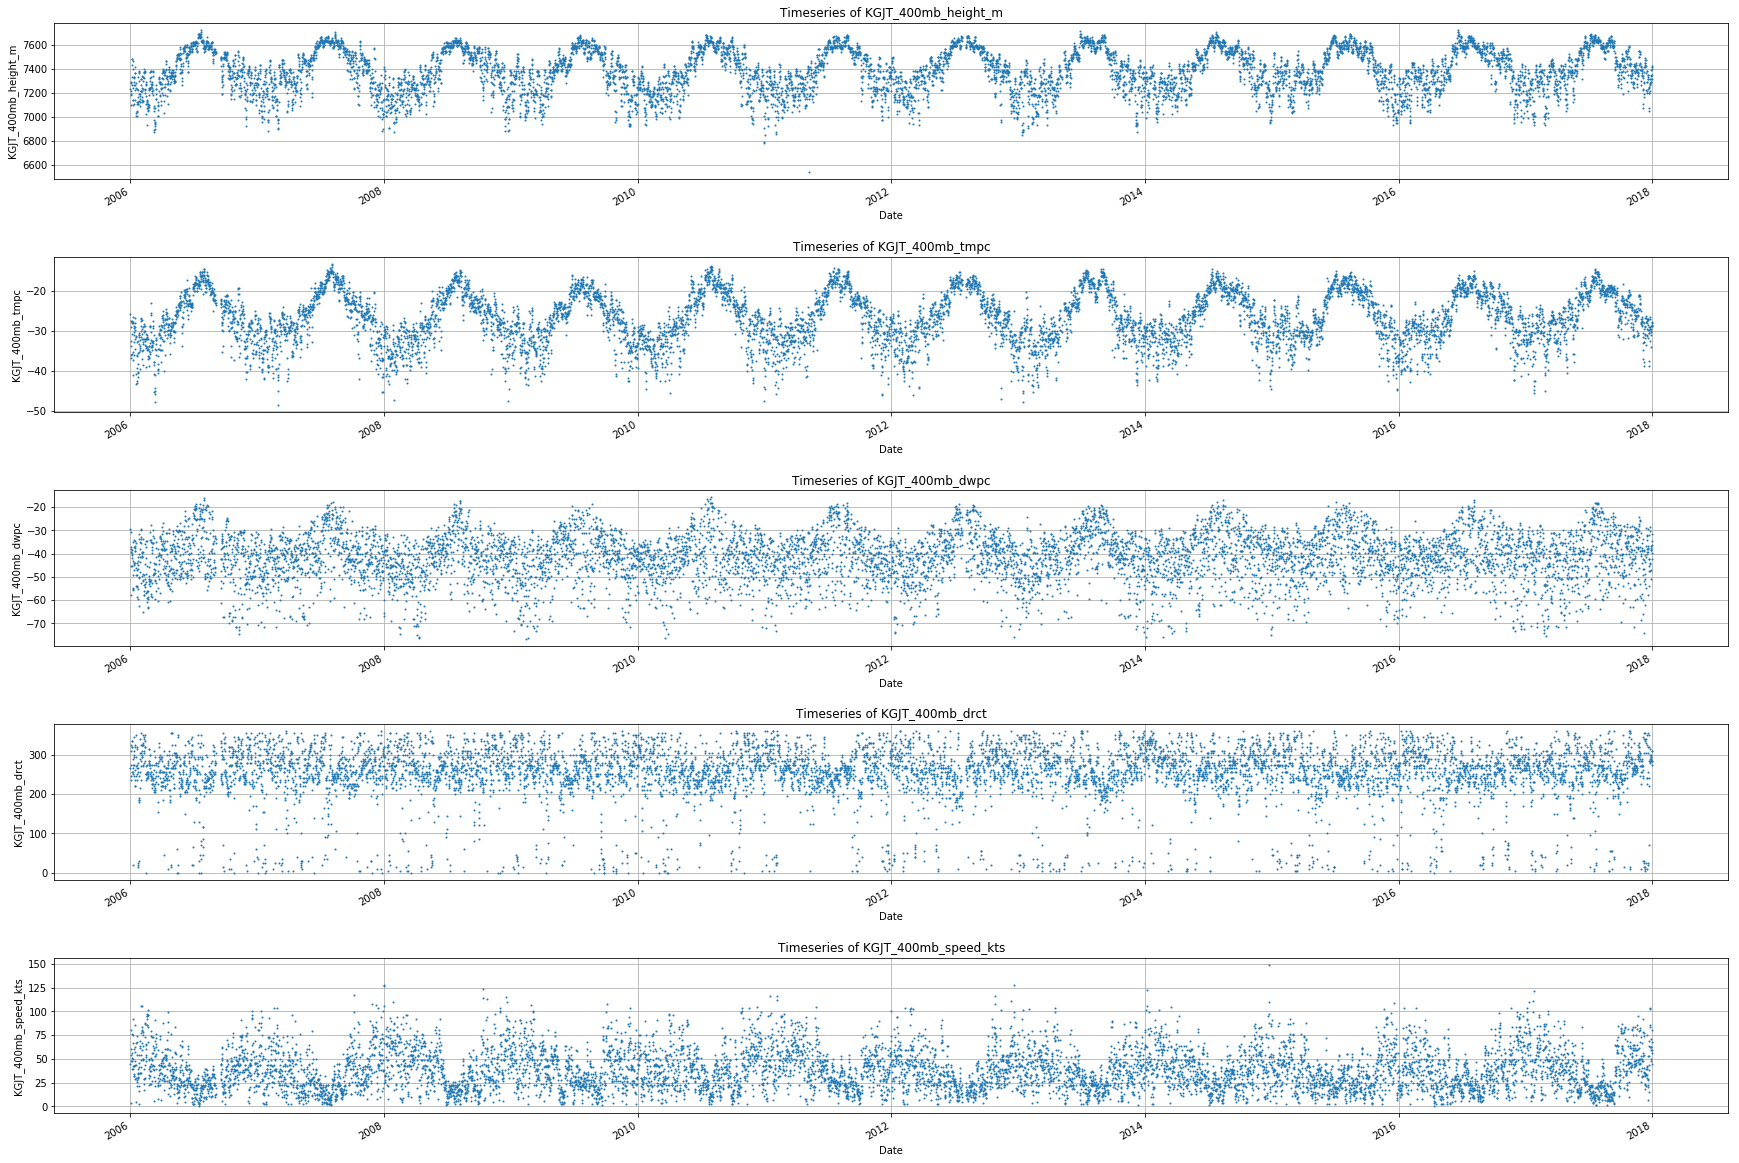

['KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts']


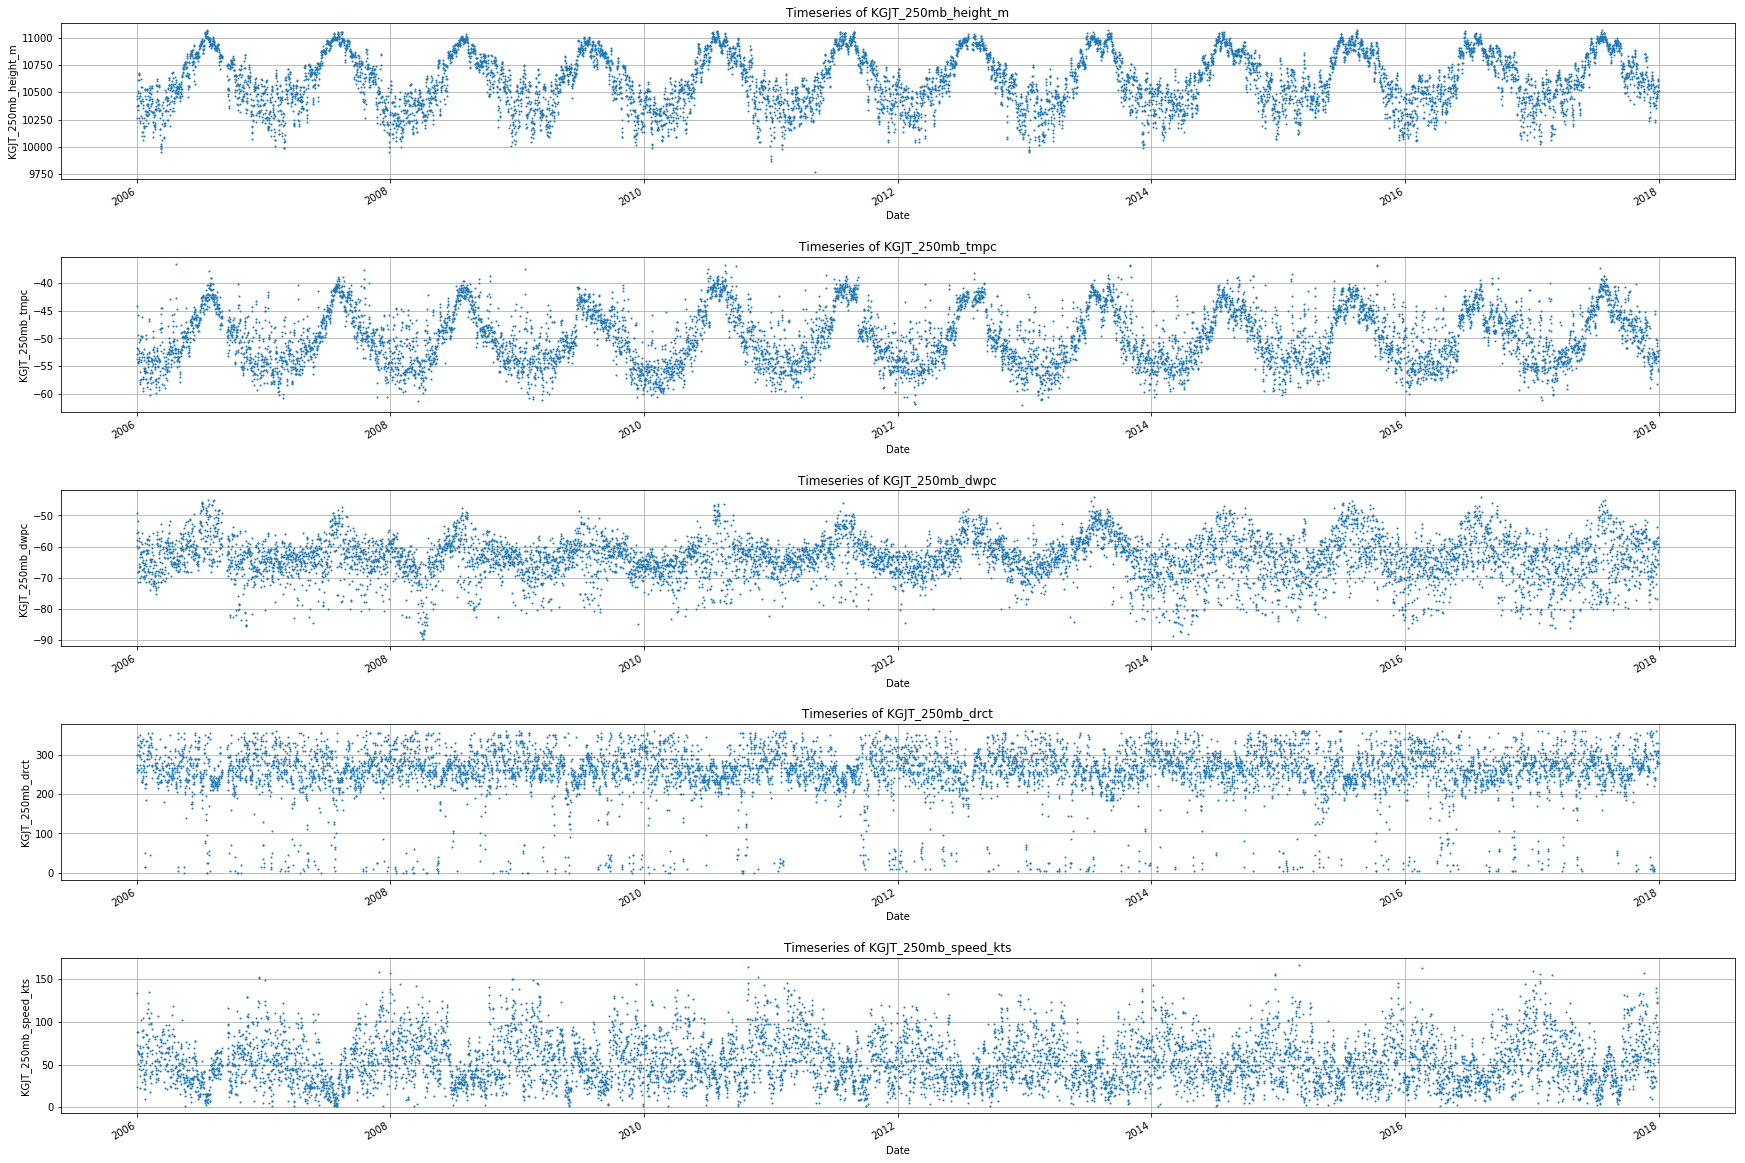

['KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts']


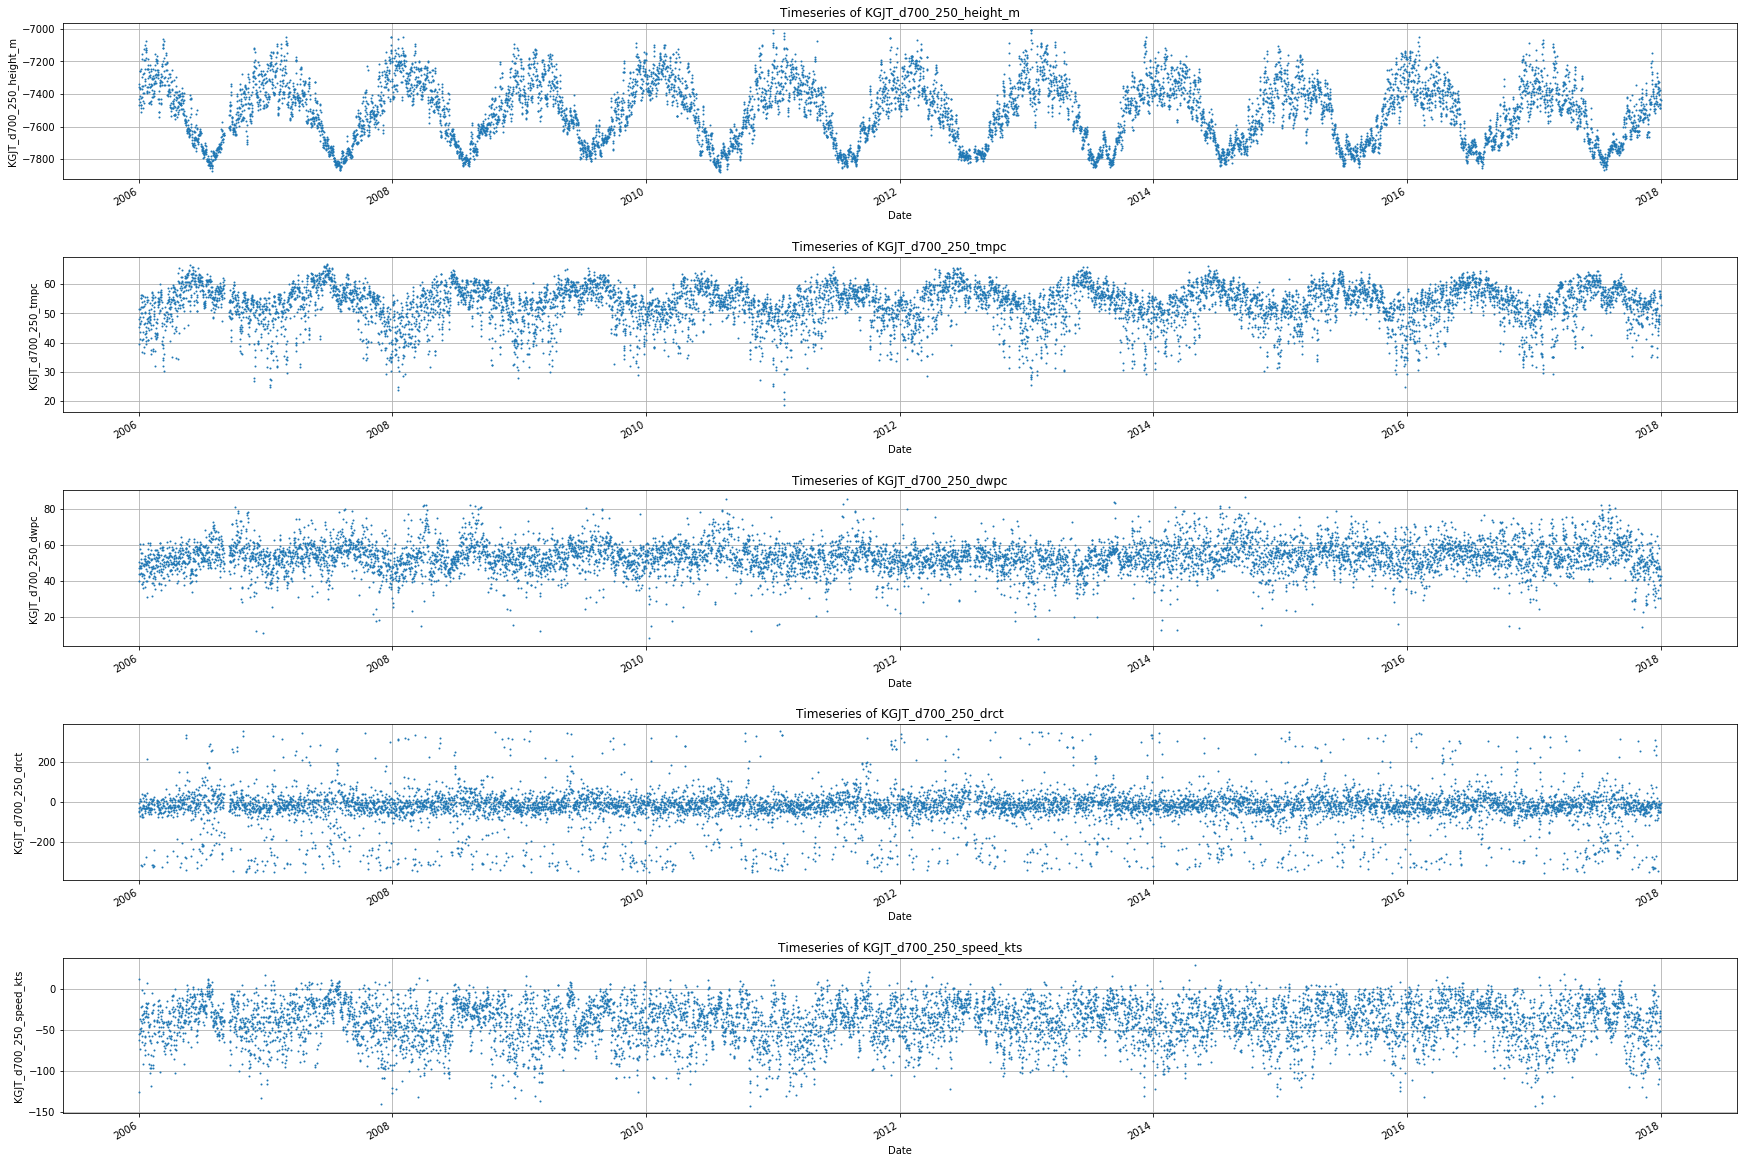

['KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts']


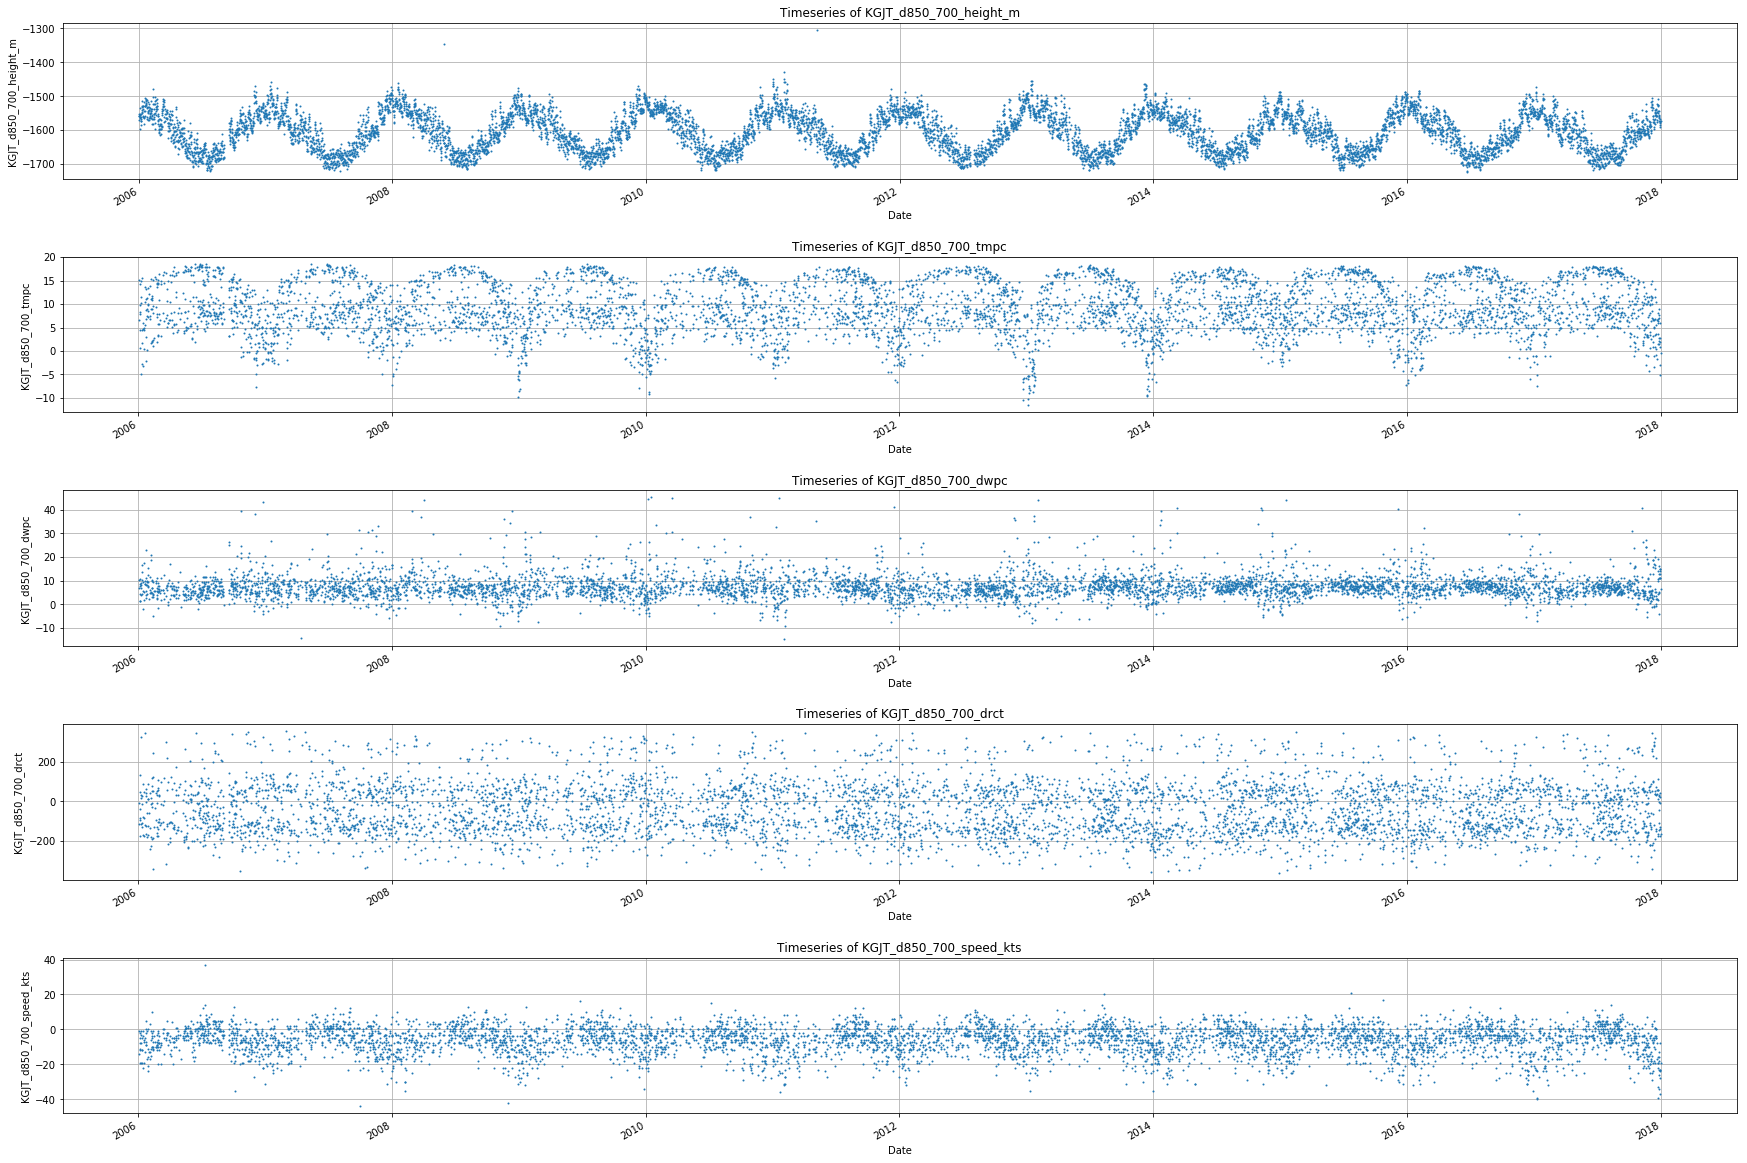

In [6]:
import re
ax = None
#%matplotlib notebook

levels = ['CMtn','CMtnSNTL', 'LXV', 'KGJT_850mb','KGJT_700mb', 'KGJT_600mb', 'KGJT_500mb', 'KGJT_400mb', 'KGJT_250mb','KGJT_d700_250', 'KGJT_d850_700']


for level in levels:
    
    fig = plt.figure(figsize=(30,70))
    
        #keys = re.findall(levels[level], asos_snotel_UA_df.keys().tolist())

    keys = list(filter(re.compile(level).search, (asos_snotel_UA_df.keys().tolist())))
    print(keys)
    #print(len(keys))

    
    #keys = asos_snotel_UA_df.filter(regex=level).columns
    for k in range(len(keys)):    
           
     
       plt.subplot(15,1, k+1)
       plt.subplots_adjust(hspace=0.5, wspace=0.2)
        
       ax = None
       ax = asos_snotel_UA_df[keys[k]]['2006':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 2)
       ax.set_xlabel("Date")
       ax.set_ylabel(keys[k])
    
       plt.title("Timeseries of " + keys[k])
       plt.grid()
       plt.axis('tight')
    #fig.savefig(keys[k]+'.png')
    plt.show()
    
    fig.clf()
    plt.close()
  

# plt.show()


** &#8657; Some notes:  
There is a a lot of missing data for year 2011 and 2016 - this should be kept in mind as it could skew some our analyses slightly  **



***
## OLS Analysis of meteorological variables and snowfall
### Training Dataset: 2008-2017 only

**Import statsmodel**

In [7]:


import statsmodels.api as sm
#import statsmodel
from statsmodels.formula.api import ols

## Single Variable Analysis
What is snowfall predictive capability of individual meteorological variables (Dewpoint, SNOTEL Temperature, Temperature, Wind Speed, Cloud Cover, Wind Direction, 6hr Pressure change, and Pressure) using an OLS model?

In [8]:


OLS_CMtn_Dewpoint = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtnSNTL_Temp = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtnSNTL_Temp_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Temperature = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Temperature_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_WindSpeed = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_WindSpeed_mps',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_CloudCover = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_CloudCover_oktas', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_WindDirection = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_WindDirection_deg', asos_snotel_UA_df['2008':'2017']).fit()
OLS_LXV_6hr_delta_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ LXV_6hr_delta_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()
OLS_LXV_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ LXV_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()


print(OLS_CMtn_Dewpoint.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtnSNTL_Temp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindSpeed.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindDirection.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_6hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")



#['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
#       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
#       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
#       'LXV_Temperature_degC', 'LXV_Dewpoint_degC'


#print(a.rsquared)
#print(a.rsquared_adj)
#print(a.rsquared_adj)
#print(a.fvalue)
#print(a.f_pvalue)
#print(a.pvalues)
print(OLS_CMtn_Dewpoint.params)
#qq=sm.qqplot(a.resid, line='r')



                               OLS Regression Results                               
Dep. Variable:     CMtnSNTL_12hrSNOWFALL_in   R-squared:                       0.033
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     6.750
Date:                      Sun, 06 Jan 2019   Prob (F-statistic):             0.0101
Time:                              22:31:16   Log-Likelihood:                -436.66
No. Observations:                       199   AIC:                             877.3
Df Residuals:                           197   BIC:                             883.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Single Variable Summary
**Adjusted R:**  
OLS_CMtn_Dewpoint: 0.028  
OLS_CMtnSNTL_Temp:  0.007  
OLS_CMtn_Temperature: 0.003  
OLS_CMtn_WindSpeed:  0.007  
OLS_CMtn_CloudCover:  -0.001  
OLS_CMtn_WindDirection:  -0.001  
OLS_LXV_6hr_delta_Pressure:   -0.001  
OLS_LXV_Pressure:   0.013  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint: 0.0101  
OLS_CMtnSNTL_Temp: 0.0929  
OLS_CMtn_Temperature:  0.219  
OLS_CMtn_WindSpeed:  0.128  
OLS_CMtn_CloudCover: 0.337  
OLS_CMtn_WindDirection:  0.395  
OLS_LXV_6hr_delta_Pressure:  0.365  
OLS_LXV_Pressure:   0.0363  
  
From this, we can glean that Dewpoint alone likely has the best fit as the adjusted R squared is the highest.  The F statistics such signficant correlations (at 5% confident interval) for only  Dewpoint and Pressure).

## Two Variable Analysis  
Since Dewpoint had best fit during Single Variable Analysis, Dewpoint will be starting variable.

In [9]:
OLS_CMtn_Dewpoint_SNTL_Temp = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtnSNTL_Temp_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_Temperature = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_Temperature_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindSpeed = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindSpeed_mps',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_CloudCover = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_CloudCover_oktas', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_LXV_6hr_delta_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + LXV_6hr_delta_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_LXV_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + LXV_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()


print(OLS_CMtn_Dewpoint_SNTL_Temp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindSpeed.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_LXV_6hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")


                               OLS Regression Results                               
Dep. Variable:     CMtnSNTL_12hrSNOWFALL_in   R-squared:                       0.033
Model:                                  OLS   Adj. R-squared:                  0.023
Method:                       Least Squares   F-statistic:                     3.359
Date:                      Sun, 06 Jan 2019   Prob (F-statistic):             0.0368
Time:                              22:31:16   Log-Likelihood:                -436.66
No. Observations:                       199   AIC:                             879.3
Df Residuals:                           196   BIC:                             889.2
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Two Variable Analysis Summary
**Adjusted R Squared**  
OLS_CMtn_Dewpoint_SNTL_Temp: 0.023  
OLS_CMtn_Dewpoint_Temperature = 0.024  
OLS_CMtn_Dewpoint_WindSpeed = 0.060  
OLS_CMtn_Dewpoint_CloudCover = -0.011  
OLS_CMtn_Dewpoint_WindDirection = 0.038  
OLS_CMtn_Dewpoint_LXV_6hr_delta_Pressure = 0.024  
OLS_CMtn_Dewpoint_LXV_Pressure = 0.037  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint_SNTL_Temp = 0.0368  
OLS_CMtn_Dewpoint_Temperature = 0.0352  
OLS_CMtn_Dewpoint_WindSpeed = 0.00118  
OLS_CMtn_Dewpoint_CloudCover = 0.538  
OLS_CMtn_Dewpoint_WindDirection = 0.0101  
OLS_CMtn_Dewpoint_LXV_6hr_delta_Pressure = 0.0372  
OLS_CMtn_Dewpoint_LXV_Pressure = 0.00947  
  
Here, Dewpoint and Wind Direction have the highest Adjusted R Squared value

## Three Variable Analysis   
Since Dewpoint+WindDirection had best adjusted R Squared value in the Two variable analysis, Dewpoint+WindDirection will be used for the Three Variable Analysis

In [10]:
OLS_CMtn_Dewpoint_WindDirection_SNTLTemp = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+CMtnSNTL_Temp_degC ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_Temperature = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+CMtn_Temperature_degC ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_CloudCover = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+CMtn_CloudCover_oktas ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_LXV_6hr_delta_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+LXV_6hr_delta_Pressure_hp ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_LXV_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + LXV_Pressure_hp ', asos_snotel_UA_df['2008':'2017']).fit()


print(OLS_CMtn_Dewpoint_WindDirection_SNTLTemp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_LXV_6hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")




                               OLS Regression Results                               
Dep. Variable:     CMtnSNTL_12hrSNOWFALL_in   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.033
Method:                       Least Squares   F-statistic:                     3.128
Date:                      Sun, 06 Jan 2019   Prob (F-statistic):             0.0270
Time:                              22:31:16   Log-Likelihood:                -411.16
No. Observations:                       189   AIC:                             830.3
Df Residuals:                           185   BIC:                             843.3
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Adjusted R Squared**  
OLS_CMtn_Dewpoint_WindDirection_SNTLTemp = 0.033  
OLS_CMtn_Dewpoint_WindDirection_Temperature = 0.033  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed = 0.060  
OLS_CMtn_Dewpoint_WindDirection_CloudCover = 0.041  
OLS_CMtn_Dewpoint_WindDirection_LXV_6hr_delta_Pressure = 0.032  
OLS_CMtn_Dewpoint_WindDirection_LXV_Pressure = 0.037  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint_WindDirection_SNTLTemp = 0.0270  
OLS_CMtn_Dewpoint_WindDirection_Temperature = 0.0269  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed = 0.00225  
OLS_CMtn_Dewpoint_WindDirection_CloudCover = 0.123  
OLS_CMtn_Dewpoint_WindDirection_LXV_6hr_delta_Pressure = 0.0292  
OLS_CMtn_Dewpoint_WindDirection_LXV_Pressure = 0.00947  
  
Here Dewpoint+WindDirection+WindSpeed has highest adjusted R squared value 


## Four Variable Analysis  
Because Dewpoint+WindDirection+WindSpeed had highest adjusted R squared in Three variable analysis,  Dewpoint+WindDirection+WindSpeed will be used in Four Variable Analysis

In [11]:
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_SNTLTemp = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps+CMtnSNTL_Temp_degC ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_Temperature = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps+CMtn_Temperature_degC', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_CloudCover = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps+CMtn_CloudCover_oktas ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_6hr_delta_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps+LXV_6hr_delta_Pressure_hp ', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps + LXV_Pressure_hp ', asos_snotel_UA_df['2008':'2017']).fit()

print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_SNTLTemp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_6hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")



                               OLS Regression Results                               
Dep. Variable:     CMtnSNTL_12hrSNOWFALL_in   R-squared:                       0.075
Model:                                  OLS   Adj. R-squared:                  0.055
Method:                       Least Squares   F-statistic:                     3.755
Date:                      Sun, 06 Jan 2019   Prob (F-statistic):            0.00582
Time:                              22:31:17   Log-Likelihood:                -408.42
No. Observations:                       189   AIC:                             826.8
Df Residuals:                           184   BIC:                             843.0
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Adjusted R Squared:**  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_SNTLTemp = 0.055  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_Temperature = 0.055  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_CloudCover = 0.040  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_6hr_delta_Pressure = 0.056  
**OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure = 0.070**

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_SNTLTemp = 0.00582  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_Temperature = 0.00576  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_CloudCover = 0.157  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_6hr_delta_Pressure = 0.00591  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure = 0.00161  
  
Here, Dewpoint+WindDirection+WindSpeed+LXV_Pressure has greatest adjusted R squared


## Five Variable Analysis  
Since Dewpoint+WindDirection+WindSpeed+LXV_Pressure had greatest adjusted R squared, Dewpoint+WindDirection+WindSpeed+LXV_Pressure will be used for the Five Variable Analysis.

In [12]:

OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_SNTLTemp  = ols('CMtnSNTL_12hrSNOWFALL_in \
                                                                       ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps + LXV_Pressure_hp + CMtnSNTL_Temp_degC', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_Temperature = ols('CMtnSNTL_12hrSNOWFALL_in \
                                                                         ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps + LXV_Pressure_hp +CMtn_Temperature_degC', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_CloudCover = ols('CMtnSNTL_12hrSNOWFALL_in \
                                                                        ~ CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps + LXV_Pressure_hp + CMtn_CloudCover_oktas', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_LXV_6hr_delta_Pressure = ols('CMtnSNTL_12hrSNOWFALL_in ~ \
                                                                                    CMtn_Dewpoint_degC + CMtn_WindDirection_deg+ CMtn_WindSpeed_mps + LXV_Pressure_hp+LXV_6hr_delta_Pressure_hp ', asos_snotel_UA_df['2008':'2017']).fit()


print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_SNTLTemp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_LXV_6hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")

                               OLS Regression Results                               
Dep. Variable:     CMtnSNTL_12hrSNOWFALL_in   R-squared:                       0.090
Model:                                  OLS   Adj. R-squared:                  0.065
Method:                       Least Squares   F-statistic:                     3.614
Date:                      Sun, 06 Jan 2019   Prob (F-statistic):            0.00385
Time:                              22:31:17   Log-Likelihood:                -405.20
No. Observations:                       188   AIC:                             822.4
Df Residuals:                           182   BIC:                             841.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Adjusted R Squared**  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_SNTLTemp: 0.065  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_Temperature: 0.066  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_CloudCover: 0.029  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_LXV_6hr_delta_Pressure: 0.066  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_SNTLTemp: 0.00385  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_Temperature: 0.00376  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_CloudCover: 0.234  
OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure_LXV_6hr_delta_Pressure:  0.00389  

Here, all adjusted R squared values are less then the maximum R Squared value found in the four variable analysis with Dewpoint+WindDirection+WindSpeed+LXV_Pressure (0.07).  Therefore, Dewpoint+WindDirection+WindSpeed+LXV_Pressure is likely best combination of variables.

### Residuals and QQ Plot - Dewpoint+WindDirection+WindSpeed+LXV_Pressure

Text(0,0.5,'Residuals')

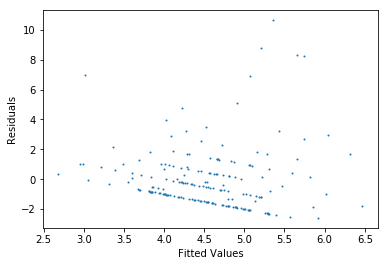

In [13]:
plt.scatter(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues,OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.resid, s = 1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

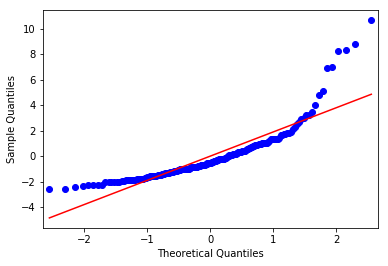

In [14]:
qq=sm.qqplot(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.resid, line='r')

count    188.000000
mean       4.535160
std        0.659761
min        2.683411
25%        4.073672
50%        4.540925
75%        4.965951
max        6.470154
dtype: float64
count    262.000000
mean       4.574198
std        2.179404
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_12hrSNOWFALL_in, dtype: float64


Text(0,0.5,'Actual Values')

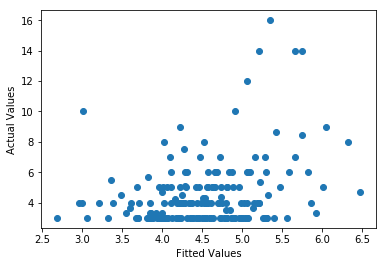

In [15]:
#plt.scatter(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues, asos_snotel_UA_df['2008':'2017']['CMtnSNTL_12hrSNOWFALL_in'], s = 1)

#plt.plot(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues)
print(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues.describe())
print(asos_snotel_UA_df['2008':'2017']['CMtnSNTL_12hrSNOWFALL_in'].describe())
idx = np.isfinite(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues) & np.isfinite(asos_snotel_UA_df['2008':'2017']['CMtnSNTL_12hrSNOWFALL_in'])
plt.scatter(OLS_CMtn_Dewpoint_WindDirection_WindSpeed_LXV_Pressure.fittedvalues[idx], asos_snotel_UA_df['2008':'2017']['CMtnSNTL_12hrSNOWFALL_in'][idx])
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")

** **

***